# B2B Payment Prediction

In [704]:
# H2HBABBA1426.csv
#Pratham kr Verma


#importing librarires

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)





import  matplotlib.pyplot as plt
import seaborn as sns
import sklearn



%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [705]:
#loading data
df=pd.read_csv('../input/mineee/H2HBABBA1426.csv')


In [706]:
#the dataset
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,NaN,2020.0,1.930693e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,NaN,3510.29,20200325.0,NAH4,1.930693e+09,1
1,U001,0200769623,WAL-MAR associates,2019-03-12 00:00:00,2019.0,1.928878e+09,2019-03-01,20190228,20190301,20190316.0,USD,RV,1.0,NaN,38885.80,20190301.0,NAH4,1.928878e+09,0
2,U001,0100012638,99 CE co,2019-09-11 00:00:00,2019.0,1.929792e+09,2019-08-26,20190826,20190826,20190910.0,USD,RV,1.0,NaN,59424.66,20190826.0,NAA8,1.929792e+09,0
3,U001,0200416837,DEC systems,2020-03-02 00:00:00,2020.0,1.930546e+09,2020-02-20,20200220,20200220,20200310.0,USD,RV,1.0,NaN,4529.39,20200216.0,NAM4,1.930546e+09,0
4,U001,200794332,COST foundation,2019-06-03 00:00:00,2019.0,1.929310e+09,2019-05-17,20190514,20190517,20190601.0,USD,RV,1.0,NaN,84062.61,20190517.0,NAAX,1.929310e+09,0


In [707]:
#checking statistical data
df.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999800e+04,50000.000000
mean,2019.304680,2.011143e+09,2.019350e+07,2.019353e+07,2.019367e+07,1.0,NaN,32285.564438,2.019353e+07,2.010844e+09,0.200000
std,0.460276,2.799124e+08,4.490852e+03,4.473842e+03,4.468403e+03,0.0,NaN,39445.004329,4.474841e+03,2.758814e+08,0.400004
min,2019.000000,1.928500e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,1.040000,2.018121e+07,1.928500e+09,0.000000
25%,2019.000000,1.929336e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4821.770000,2.019051e+07,1.929336e+09,0.000000
50%,2019.000000,1.929955e+09,2.019091e+07,2.019091e+07,2.019092e+07,1.0,NaN,17309.245000,2.019091e+07,1.929955e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,46968.520000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,702254.070000,2.020052e+07,2.960634e+09,1.000000


In [708]:
#checking data types and unique data
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open_amount       50000 non-null

business_code                 6
cust_number                1442
name_customer              4207
clear_date                  410
buisness_year                 2
doc_id                    48856
posting_date                503
document_create_date        505
document_create_date.1      503
due_in_date                 546
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44219
baseline_create_date        507
cust_payment_terms           73
invoice_id                48854
isOpen                        2
dtype: int64

In [709]:
#object data type columns evaluation
df.describe(include=object)

,business_code,cust_number,name_customer,clear_date,posting_date,invoice_currency,document type,cust_payment_terms
count,50000,50000,50000,40000,50000,50000,50000,50000
unique,6,1442,4207,410,503,2,2,73
top,U001,0200769623,WAL-MAR llc,2019-09-03 00:00:00,2020-03-25,USD,RV,NAA8
freq,45392,11488,1162,257,219,46110,49998,20036


In [710]:
#checking the amount of null values 
df.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             50000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

###  separating the main test values from training values

In [711]:

main_train = df[df.clear_date.isnull()==False]
main_test = df[df.clear_date.isnull()]

In [712]:
main_train.shape

(40000, 19)

# --preprocessing--

In [713]:
main_train.isna().sum()


business_code                 0
cust_number                   0
name_customer                 0
clear_date                    0
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             40000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    2
isOpen                        0
dtype: int64

### Date Time Conversion

In [714]:

main_train['posting_date'] = pd.to_datetime(
                          main_train['posting_date']
                          
)
main_train['document_create_date.1'] = pd.to_datetime(
                          main_train['document_create_date.1'],
                          format='%Y%m%d'
)
main_train['due_in_date'] = pd.to_datetime(
                          main_train['due_in_date'],
                          format='%Y%m%d'
)
main_train['baseline_create_date'] = pd.to_datetime(
                          main_train['baseline_create_date'],
                          format='%Y%m%d'
)
main_train['clear_date'] = pd.to_datetime(
                          main_train['clear_date'],
                         
)
main_train['document_create_date'] = pd.to_datetime(
                          main_train['document_create_date'],
                          format='%Y%m%d'
)

### creating the target column 

In [715]:

main_train['delay']= ( main_train['clear_date']-main_train['due_in_date']).dt.days

### Null Impuation

In [716]:
#deleting the duplicate rows based on invoice id
main_train.drop_duplicates(['invoice_id'], keep='first',inplace=True)

In [717]:
#dropping columns that are not useful in predicting 
#area_business-column is null
#posting_id-constant
#doc_id-different values
#business_year-constant
main_train.drop(['area_business','invoice_id','posting_id','doc_id','buisness_year',],axis=1,inplace=True
               )

In [718]:
#check after preprocessing
main_train          

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen,delay
1,U001,0200769623,WAL-MAR associates,2019-03-12,2019-03-01,2019-02-28,2019-03-01,2019-03-16,USD,RV,38885.80,2019-03-01,NAH4,0,-4
2,U001,0100012638,99 CE co,2019-09-11,2019-08-26,2019-08-26,2019-08-26,2019-09-10,USD,RV,59424.66,2019-08-26,NAA8,0,1
3,U001,0200416837,DEC systems,2020-03-02,2020-02-20,2020-02-20,2020-02-20,2020-03-10,USD,RV,4529.39,2020-02-16,NAM4,0,-8
4,U001,200794332,COST foundation,2019-06-03,2019-05-17,2019-05-14,2019-05-17,2019-06-01,USD,RV,84062.61,2019-05-17,NAAX,0,2
5,U001,0200707822,PUBLI trust,2019-11-06,2019-10-22,2019-10-22,2019-10-22,2019-11-06,USD,RV,98683.74,2019-10-22,NAA8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200726979,BJ'S corp,2019-05-29,2019-05-14,2019-05-13,2019-05-14,2019-05-29,USD,RV,298.58,2019-05-14,NAA8,0,0
49996,U001,0200780383,MEIJ trust,2019-11-08,2019-10-23,2019-10-23,2019-10-23,2019-11-07,USD,RV,62715.46,2019-10-23,NAA8,0,1
49997,U001,0200337148,COAS corporation,2019-01-23,2019-01-08,2019-01-09,2019-01-08,2019-01-23,USD,RV,152051.82,2019-01-08,NAA8,0,0
49998,U001,0200707822,PUBLI co,2019-02-22,2019-02-07,2019-02-07,2019-02-07,2019-02-22,USD,RV,65125.56,2019-02-07,NAA8,0,0


In [719]:
for col in main_train.columns:
    if main_train[col].nunique()<= 12:
        print(main_train[col].value_counts())
        print('-----')

U001    35396
CA02     3126
U013      475
U002      128
U005       12
U007        7
Name: business_code, dtype: int64
-----
USD    36018
CAD     3126
Name: invoice_currency, dtype: int64
-----
RV    39143
X2        1
Name: document type, dtype: int64
-----
0    39144
Name: isOpen, dtype: int64
-----


In [720]:
# clubbing business code with low occurance in dataset - to ensure model gets max information
main_train['business_code'] = np.where(main_train['business_code'].isin(["U005",
                                                             "U007"]),"Other business"
                                                             ,main_train['business_code'])

In [721]:
#sorting on basis of posting date
main_train.sort_values(by=['posting_date'],inplace=True)

### checking outliers on whole train data

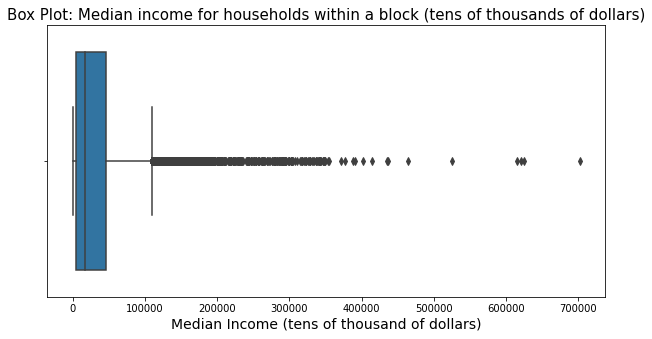

In [722]:
#delay is dependent on amount so outliers need to be removed
fig = plt.figure(figsize=(10,5))
sns.boxplot(main_train.total_open_amount)
plt.title('Box Plot: Median income for households within a block (tens of thousands of dollars)', fontsize=15)
plt.xlabel('Median Income (tens of thousand of dollars)', fontsize=14)
plt.show()

In [723]:
#removing outliers from amount column using quantile method.adjusted the quantiles so as not 
#to drop multiple rows
y = main_train['total_open_amount']
outliers_found = y.between(y.quantile(.02), y.quantile(.98))
outliers_found=outliers_found.rename_axis('id').reset_index(name='outliers')
outliers_found=outliers_found[outliers_found['outliers']==False]
fg=list(outliers_found['id'])
print(len(fg))
main_train=main_train.drop(fg)

1564


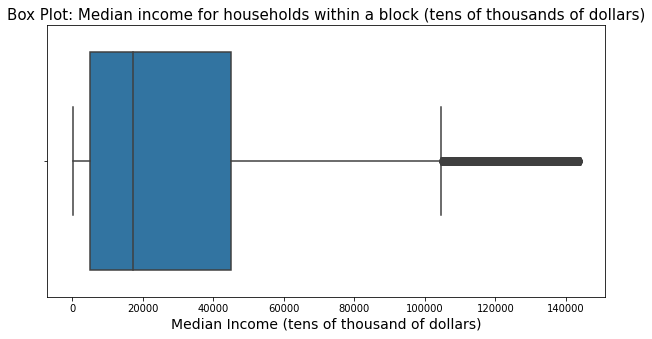

In [724]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(main_train.total_open_amount)
plt.title('Box Plot: Median income for households within a block (tens of thousands of dollars)', fontsize=15)
plt.xlabel('Median Income (tens of thousand of dollars)', fontsize=14)
plt.show()

In [725]:
#removing outliers from delay column(target column) using quantile method
y = main_train['delay']

outliers_found = y.between(y.quantile(.02), y.quantile(.98))
outliers_found=outliers_found.rename_axis('id').reset_index(name='outliers')
outliers_found=outliers_found[outliers_found['outliers']==False]
fg=list(outliers_found['id'])
print(len(fg))
main_train=main_train.drop(fg)

1472


In [726]:
#splitting the data first into two part -- and then to two other parts
#we get the train test and validation split

from sklearn.model_selection import train_test_split
x=main_train.drop(['delay'],axis=1)
y=main_train['delay']
x_train,x_inter_test,y_train,y_inter_test = train_test_split(x,y,test_size=0.22,random_state=0 , shuffle = False)
x_validation,x_test,y_validation,y_test = train_test_split(x_inter_test,y_inter_test,test_size=0.5,random_state=0 , shuffle = False)

In [727]:
x_train.shape,x_validation.shape,x_test.shape

((28164, 14), (3972, 14), (3972, 14))

In [728]:
x_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
26745,U001,0200769623,WAL-MAR associates,2019-01-15,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,15323.39,2018-12-30,NAH4,0
39236,U001,0200769623,WAL-MAR associates,2019-01-17,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,31227.25,2018-12-30,NAH4,0
33436,U001,0200769623,WAL-MAR us,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,15802.32,2018-12-30,NAH4,0
42710,U001,0200707822,PUBLI trust,2019-01-14,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,128132.22,2018-12-30,NAA8,0
14260,U001,0200769623,WAL-MAR associates,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,2772.34,2018-12-30,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21741,CA02,0140106408,WAL-M,2019-12-05,2019-11-09,2019-11-09,2019-11-09,2019-11-20,CAD,RV,7140.18,2019-11-10,CA10,0
5879,U001,0200769623,WAL-MAR,2019-11-19,2019-11-09,2019-11-08,2019-11-09,2019-11-24,USD,RV,6532.60,2019-11-09,NAH4,0
47218,U001,0200794332,COST,2019-11-25,2019-11-09,2019-11-09,2019-11-09,2019-11-24,USD,RV,3711.28,2019-11-09,NAAX,0
48921,U001,0200769623,WAL-MAR trust,2019-11-19,2019-11-09,2019-11-08,2019-11-09,2019-11-24,USD,RV,53098.06,2019-11-09,NAH4,0


In [729]:
x_validation

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
30691,U001,0200706844,WINC corporation,2019-11-25,2019-11-09,2019-11-05,2019-11-09,2019-11-24,USD,RV,20651.54,2019-11-09,NAA8,0
2511,U001,0200762301,C&S WH trust,2019-11-26,2019-11-09,2019-11-08,2019-11-09,2019-11-24,USD,RV,48836.47,2019-11-09,NAC6,0
49084,U001,0200769623,WAL-MAR us,2019-11-19,2019-11-09,2019-11-08,2019-11-09,2019-11-24,USD,RV,13262.64,2019-11-09,NAH4,0
30914,CA02,0140106408,WAL-M foundation,2019-11-28,2019-11-09,2019-11-09,2019-11-09,2019-11-21,CAD,RV,9869.64,2019-11-11,CA10,0
2510,U001,0200762301,C&S WH associates,2019-11-26,2019-11-09,2019-11-08,2019-11-09,2019-11-24,USD,RV,383.85,2019-11-09,NAC6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38902,U001,0200778870,C systems,2020-01-24,2020-01-08,2020-01-07,2020-01-08,2020-01-23,USD,RV,3253.24,2020-01-08,NAA8,0
44815,U001,0200762301,C&S WH trust,2020-01-23,2020-01-08,2020-01-08,2020-01-08,2020-01-23,USD,RV,143924.91,2020-01-08,NAC6,0
42027,U001,0200455322,PEA co,2020-02-06,2020-01-08,2020-01-06,2020-01-08,2020-02-07,USD,RV,46742.93,2020-01-08,NAD5,0
44968,U001,0200759878,SA corporation,2020-01-23,2020-01-08,2020-01-06,2020-01-08,2020-01-23,USD,RV,18063.13,2020-01-08,NAH4,0


In [730]:
x_test

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
18823,U001,0200761734,H E BUT corporation,2020-01-22,2020-01-08,2020-01-08,2020-01-08,2020-01-23,USD,RV,63384.76,2020-01-08,NAA8,0
21888,U001,0140142846,MONDE us,2020-03-09,2020-01-08,2020-01-05,2020-01-08,2020-03-08,USD,RV,54361.95,2020-01-08,NACB,0
9376,U001,0200759878,SA us,2020-01-24,2020-01-08,2020-01-05,2020-01-08,2020-01-23,USD,RV,10256.82,2020-01-08,NAH4,0
35109,U001,0100032278,SI in,2020-01-28,2020-01-08,2020-01-08,2020-01-08,2020-01-23,USD,RV,10070.80,2020-01-08,NAA8,0
24696,CA02,0140104472,MARTIN us,2020-01-22,2020-01-08,2020-01-08,2020-01-08,2020-01-20,CAD,RV,35443.44,2020-01-10,CA10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31612,U001,0200726979,BJ'S,2020-03-12,2020-02-26,2020-02-26,2020-02-26,2020-03-12,USD,RV,831.10,2020-02-26,NAA8,0
8574,U001,0200783734,FAREW corporation,2020-03-12,2020-02-27,2020-02-27,2020-02-27,2020-03-13,USD,RV,60645.81,2020-02-27,NAA8,0
45865,U001,0200571849,US associates,2020-03-20,2020-02-27,2020-02-27,2020-02-27,2020-03-18,USD,RV,4230.72,2020-02-27,NAD1,0
26376,U001,0200759878,SA corp,2020-03-13,2020-02-27,2020-02-26,2020-02-27,2020-03-13,USD,RV,65988.21,2020-02-27,NAH4,0


In [731]:
#changing the currency to match with the other
x_train.loc[x_train['invoice_currency'] == 'CAD'].total_open_amount*0.81
x_test.loc[x_test['invoice_currency'] == 'CAD'].total_open_amount*0.81
x_validation.loc[x_validation['invoice_currency'] == 'CAD'].total_open_amount*0.81

30914     7994.4084
6400       278.6643
2352       884.6010
2819     57634.4079
39512    29690.4366
            ...    
27394     2641.6530
4987     14685.0813
10676    24640.8237
20032     2594.2680
8847     24612.9840
Name: total_open_amount, Length: 316, dtype: float64

# EDA

<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

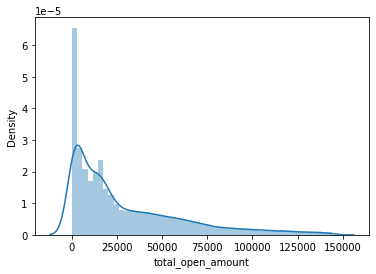

In [732]:
#checking the skewness of total open amount
sns.distplot(x_train['total_open_amount'])

In [733]:
x_train.describe()

,total_open_amount,isOpen
count,28164.000000,28164.0
mean,29686.087486,0.0
std,31671.964099,0.0
min,134.790000,0.0
25%,5160.600000,0.0
50%,17274.665000,0.0
75%,45261.320000,0.0
max,143980.220000,0.0


In [734]:
x_train

,business_code,cust_number,name_customer,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,total_open_amount,baseline_create_date,cust_payment_terms,isOpen
26745,U001,0200769623,WAL-MAR associates,2019-01-15,2018-12-30,2018-12-30,2018-12-30,2019-01-14,USD,RV,15323.39,2018-12-30,NAH4,0
39236,U001,0200769623,WAL-MAR associates,2019-01-17,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,31227.25,2018-12-30,NAH4,0
33436,U001,0200769623,WAL-MAR us,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,15802.32,2018-12-30,NAH4,0
42710,U001,0200707822,PUBLI trust,2019-01-14,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,128132.22,2018-12-30,NAA8,0
14260,U001,0200769623,WAL-MAR associates,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,USD,RV,2772.34,2018-12-30,NAH4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21741,CA02,0140106408,WAL-M,2019-12-05,2019-11-09,2019-11-09,2019-11-09,2019-11-20,CAD,RV,7140.18,2019-11-10,CA10,0
5879,U001,0200769623,WAL-MAR,2019-11-19,2019-11-09,2019-11-08,2019-11-09,2019-11-24,USD,RV,6532.60,2019-11-09,NAH4,0
47218,U001,0200794332,COST,2019-11-25,2019-11-09,2019-11-09,2019-11-09,2019-11-24,USD,RV,3711.28,2019-11-09,NAAX,0
48921,U001,0200769623,WAL-MAR trust,2019-11-19,2019-11-09,2019-11-08,2019-11-09,2019-11-24,USD,RV,53098.06,2019-11-09,NAH4,0


In [735]:
x_test.info()
x_test.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3972 entries, 18823 to 10905
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           3972 non-null   object        
 1   cust_number             3972 non-null   object        
 2   name_customer           3972 non-null   object        
 3   clear_date              3972 non-null   datetime64[ns]
 4   posting_date            3972 non-null   datetime64[ns]
 5   document_create_date    3972 non-null   datetime64[ns]
 6   document_create_date.1  3972 non-null   datetime64[ns]
 7   due_in_date             3972 non-null   datetime64[ns]
 8   invoice_currency        3972 non-null   object        
 9   document type           3972 non-null   object        
 10  total_open_amount       3972 non-null   float64       
 11  baseline_create_date    3972 non-null   datetime64[ns]
 12  cust_payment_terms      3972 non-null   obj

,total_open_amount,isOpen
count,3972.000000,3972.0
mean,29948.658129,0.0
std,31586.282583,0.0
min,135.000000,0.0
25%,5619.427500,0.0
50%,17678.590000,0.0
75%,46277.860000,0.0
max,144047.740000,0.0


<AxesSubplot:xlabel='total_open_amount', ylabel='Density'>

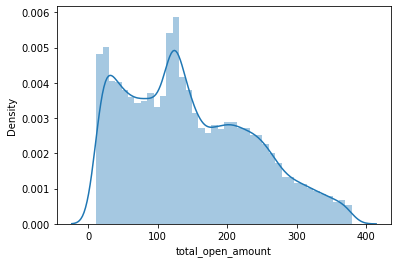

In [736]:
#unsing sqrt transformation to reduce right skewness
sns.distplot(np.sqrt(x_train['total_open_amount']))
#sns.distplot(x_train['total_open_amount'])

<AxesSubplot:xlabel='delay', ylabel='total_open_amount'>

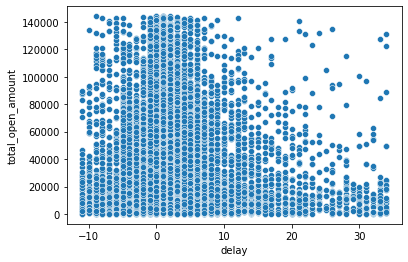

In [737]:
#most pay the amount in or before due time .and some pay after due date
sns.scatterplot(data=x_train.merge(y_train,on = x_train.index), x="delay", y="total_open_amount")

In [738]:
#square root transformation to reduce skewness in amount 
x_train['total_open_amount']=np.sqrt(x_train['total_open_amount'])


In [739]:
x_train['total_open_amount'].max()

379.4472558867701

In [740]:
x_train['total_open_amount'].min()

11.60990956037126

# Feature Engg

### ENCODING CATEGORICAL VALUES

** --using label encoding because one hot encoding would increase dimension.so to avoid curse of dimensionality we use label encoding as it labels the values in numbers
  and prevents dimension increase--**


In [741]:
from sklearn.preprocessing import LabelEncoder
business_encoder = LabelEncoder()
business_encoder.fit(x_train['business_code'])
x_train['business_enco'] = business_encoder.transform(x_train['business_code'])
x_test['business_enco'] = business_encoder.transform(x_test['business_code'])
x_validation['business_enco'] = business_encoder.transform(x_validation['business_code'])

In [742]:
customer_encoder = LabelEncoder()


customer_encoder.fit(x_train['cust_number'])
x_train['cust_enco'] = customer_encoder.transform(x_train['cust_number'])


# finding what are the new catagories in the validation set
diff = set(x_validation['cust_number'])-set(customer_encoder.classes_)

# adding them to the classess variable 
for items in diff:
    customer_encoder.classes_ = np.append(customer_encoder.classes_,items)
x_validation['cust_enco'] = customer_encoder.transform(x_validation['cust_number'])

# doing same thing for test also

diff2 = set(x_test['cust_number'])-set(customer_encoder.classes_)
for items in diff2:
    customer_encoder.classes_ = np.append(customer_encoder.classes_,items)
x_test['cust_enco'] = customer_encoder.transform(x_test['cust_number'])    

In [743]:

terms_encoder = LabelEncoder()
terms_encoder.fit(x_train['cust_payment_terms'])
x_train['terms_enco'] = terms_encoder.transform(x_train['cust_payment_terms'])

diff = set(x_validation['cust_payment_terms'])-set(terms_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    terms_encoder.classes_ = np.append(terms_encoder.classes_,items)
x_validation['terms_enco'] = terms_encoder.transform(x_validation['cust_payment_terms'])

# doing same thing for test also

diff2 = set(x_test['cust_payment_terms'])-set(terms_encoder.classes_)
for items in diff2:
    terms_encoder.classes_ = np.append(terms_encoder.classes_,items)
x_test['terms_enco'] = terms_encoder.transform(x_test['cust_payment_terms'])    

In [744]:

name_customer_encoder = LabelEncoder()

name_customer_encoder.fit(x_train['name_customer'])
x_train['name_customer_enco'] = name_customer_encoder.transform(x_train['name_customer'])
# finding what are the new catagories in the validation set
diff = set(x_validation['name_customer'])-set(name_customer_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)
x_validation['name_customer_enco'] = name_customer_encoder.transform(x_validation['name_customer'])

# doing same thing for test also

diff2 = set(x_test['name_customer'])-set(name_customer_encoder.classes_)
for items in diff2:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)
x_test['name_customer_enco'] = name_customer_encoder.transform(x_test['name_customer'])    

In [745]:


document_type_encoder = LabelEncoder()

document_type_encoder.fit(x_train['document type'])
x_train['doc_type_enco'] = document_type_encoder.transform(x_train['document type'])
# finding what are the new catagories in the validation set
diff = set(x_validation['document type'])-set(document_type_encoder.classes_)

# adding them to the classess variable // 
for items in diff:
    document_type_encoder.classes_ = np.append(document_type_encoder.classes_,items)
x_validation['doc_type_enco'] = document_type_encoder.transform(x_validation['document type'])

# doing same thing for test also

diff2 = set(x_test['document type'])-set(document_type_encoder.classes_)
for items in diff2:
    document_type_encoder.classes_ = np.append(document_type_encoder.classes_,items)
x_test['doc_type_enco'] = document_type_encoder.transform(x_test['document type'])   

In [746]:
x_train[['business_enco','business_code']].value_counts()

business_enco  business_code 
2              U001              25623
0              CA02               2090
4              U013                338
3              U002                 97
1              Other business       16
dtype: int64

## extracting dates features from due_in_date and document_create_date
delay depends upon when document was created and when was the due date


In [747]:

x_train['due_in_date_month'] = x_train['due_in_date'].dt.month
x_train['due_in_date_week'] = x_train['due_in_date'].dt.week
x_train['due_in_date_day'] = x_train['due_in_date'].dt.day
x_train['due_in_date_week_day'] = x_train['due_in_date'].dt.dayofweek
x_train['day_of_week'] = x_train['due_in_date'].dt.weekday 

In [748]:
x_validation['due_in_date_month'] = x_validation['due_in_date'].dt.month
x_validation['due_in_date_week'] = x_validation['due_in_date'].dt.week
x_validation['due_in_date_day'] = x_validation['due_in_date'].dt.day
x_validation['due_in_date_week_day'] = x_validation['due_in_date'].dt.dayofweek
x_validation['day_of_week'] = x_validation['due_in_date'].dt.weekday 


In [749]:
x_test['due_in_date_month'] = x_test['due_in_date'].dt.month
x_test['due_in_date_week'] = x_test['due_in_date'].dt.week
x_test['due_in_date_day'] = x_test['due_in_date'].dt.day
x_test['due_in_date_week_day'] = x_test['due_in_date'].dt.dayofweek
x_test['day_of_week'] = x_test['due_in_date'].dt.weekday 

In [750]:
x_train['doc_create_month'] = x_train['document_create_date.1'].dt.month
x_train['doc_create_week'] = x_train['document_create_date.1'].dt.week
x_train['doc_create_day'] = x_train['document_create_date.1'].dt.day
x_train['doc_create_week_day'] = x_train['document_create_date.1'].dt.dayofweek
x_train['doc_create_month'] = x_train['document_create_date.1'].dt.weekday 

In [751]:
x_test['doc_create_month'] = x_test['document_create_date.1'].dt.month
x_test['doc_create_week'] = x_test['document_create_date.1'].dt.week
x_test['doc_create_day'] = x_test['document_create_date.1'].dt.day
x_test['doc_create_week_day'] = x_test['document_create_date.1'].dt.dayofweek
x_test['doc_create_week'] = x_test['document_create_date.1'].dt.weekday 

In [752]:
x_validation['doc_create_month'] = x_validation['document_create_date.1'].dt.month
x_validation['doc_create_week'] = x_validation['document_create_date.1'].dt.week
x_validation['doc_create_day'] = x_validation['document_create_date.1'].dt.day
x_validation['doc_create_week_day'] = x_validation['document_create_date.1'].dt.dayofweek
x_validation['doc_create_week'] = x_validation['document_create_date.1'].dt.weekday 

In [753]:
#a function to drop columns
def dropper(col ,traindf = x_train,valdf = x_validation,testdf = x_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

In [754]:
#dropping columns that has been used to form features,encoded or transformed
x_train ,x_validation, x_test = dropper(['document_create_date.1'])
x_train ,x_validation, x_test = dropper(['due_in_date'])
x_train ,x_validation, x_test = dropper(['business_code'])
x_train ,x_validation, x_test = dropper(['cust_payment_terms'])
x_train ,x_validation, x_test = dropper(['invoice_currency'])
x_train ,x_validation, x_test = dropper(['cust_number'])
x_train ,x_validation, x_test = dropper(['posting_date'])
x_train ,x_validation, x_test = dropper(['isOpen'])
x_train ,x_validation, x_test = dropper(['name_customer'])
x_train ,x_validation, x_test = dropper(['clear_date'])
x_train ,x_validation, x_test = dropper(['document type'])
x_train ,x_validation, x_test = dropper(['baseline_create_date'])
x_train ,x_validation, x_test = dropper(['document_create_date'])

# Feature Selection

In [755]:
#check the covariance of the columns
x_train.cov()

,total_open_amount,business_enco,cust_enco,terms_enco,name_customer_enco,doc_type_enco,due_in_date_month,due_in_date_week,due_in_date_day,due_in_date_week_day,day_of_week,doc_create_month,doc_create_week,doc_create_day,doc_create_week_day
total_open_amount,8189.723635,-3.920420,-195.376000,-136.850740,2.195201e+03,0.0,-1.535561,-8.103271,-8.243995,2.112938,2.112938,1.020550,1.402955,8.557445,1.020550
business_enco,-3.920420,0.334090,43.567397,3.277268,6.773023e+00,0.0,0.004898,0.035021,0.047699,-0.050968,-0.050968,0.026486,-0.121945,0.009690,0.026486
cust_enco,-195.376000,43.567397,53541.347243,717.845229,4.361745e+04,0.0,-34.491799,-146.905693,28.154706,-4.739049,-4.739049,25.054674,-167.406304,-16.168570,25.054674
terms_enco,-136.850740,3.277268,717.845229,106.398186,1.793296e+03,0.0,1.415109,6.480849,1.315905,-0.900290,-0.900290,1.920515,1.206772,0.980905,1.920515
name_customer_enco,2195.200917,6.773023,43617.447437,1793.296303,1.301925e+06,0.0,-33.425925,-148.210994,-29.068984,-9.340396,-9.340396,211.149330,-91.291609,48.718032,211.149330
doc_type_enco,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
due_in_date_month,-1.535561,0.004898,-34.491799,1.415109,-3.342592e+01,0.0,8.788700,37.861289,-2.432586,0.038878,0.038878,0.008126,36.960521,1.568736,0.008126
due_in_date_week,-8.103271,0.035021,-146.905693,6.480849,-1.482110e+02,0.0,37.861289,164.700196,0.142521,-0.312891,-0.312891,-0.127840,160.768894,2.495391,-0.127840
due_in_date_day,-8.243995,0.047699,28.154706,1.315905,-2.906898e+01,0.0,-2.432586,0.142521,75.155267,0.100271,0.100271,-0.196230,0.066363,-30.486290,-0.196230
due_in_date_week_day,2.112938,-0.050968,-4.739049,-0.900290,-9.340396e+00,0.0,0.038878,-0.312891,0.100271,3.476644,3.476644,0.936903,-0.190018,-0.166154,0.936903


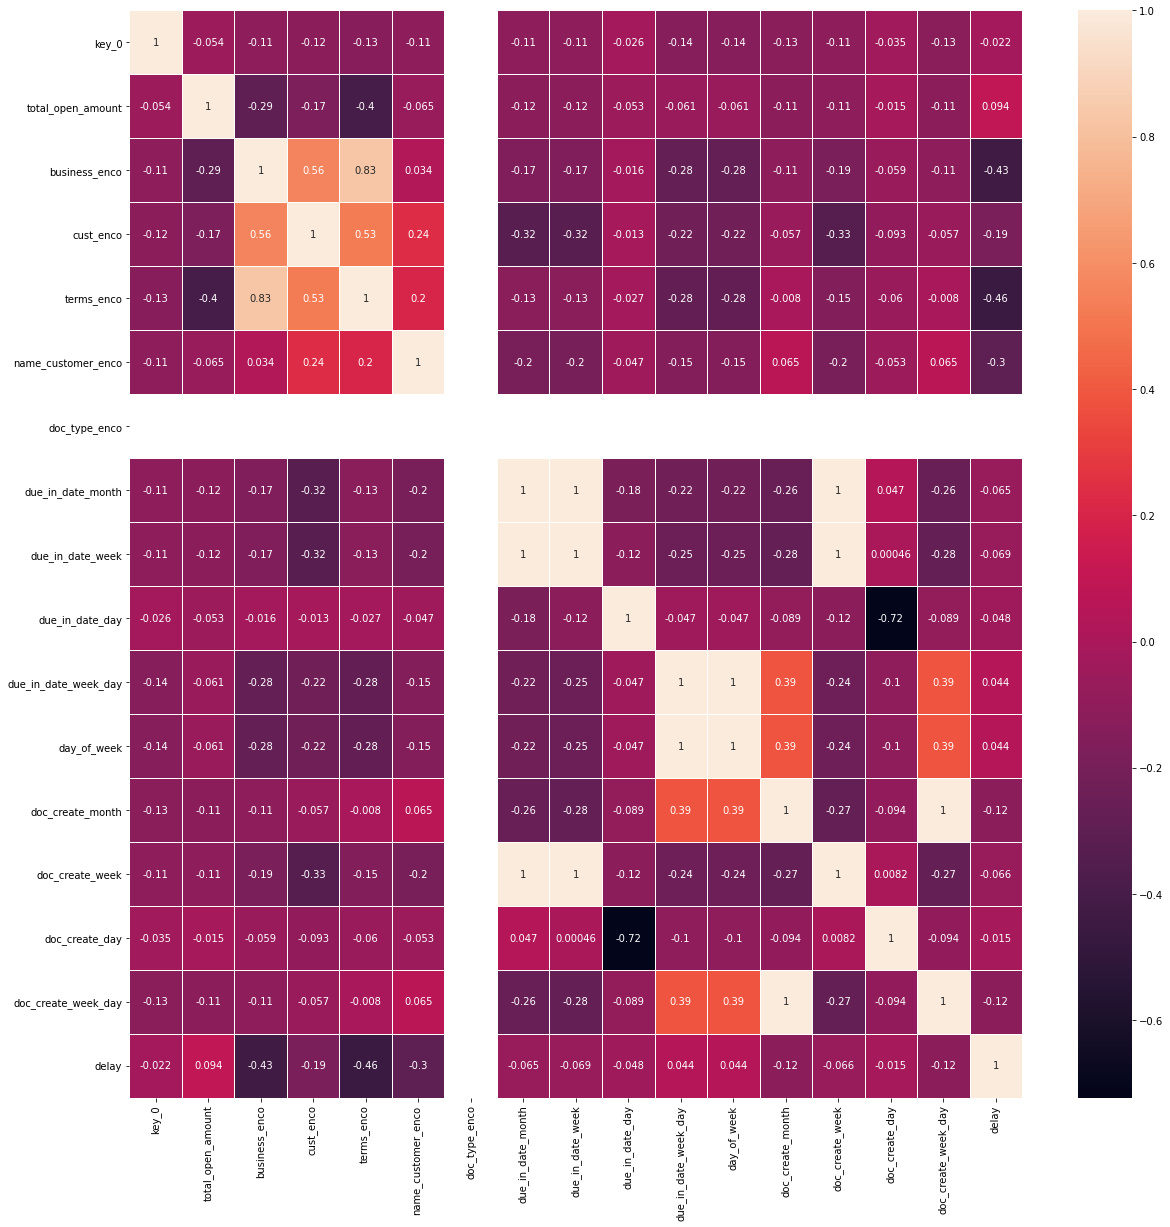

In [756]:
#heatmap to check the co-realtion between the columns and target column 
#removing constant ,highly corelated columns
plo = pd.DataFrame (x_train.merge(y_train , on = x_train.index).corr())
fig, ax = plt.subplots(figsize=(20,20))  
corrMatrix = plo.corr()
sn.heatmap(corrMatrix, annot=True,ax=ax,linewidths=1,)
plt.show()

doc_type_enc is constant

In [757]:
#using VarianceThreshold to remove low variance columns
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(x_train)

VarianceThreshold(threshold=0.8)

In [758]:

sel.variances_

array([8.18943285e+03, 3.34078077e-01, 5.35394462e+04, 1.06394408e+02,
       1.30187913e+06, 0.00000000e+00, 8.78838793e+00, 1.64694348e+02,
       7.51525989e+01, 3.47652092e+00, 3.47652092e+00, 3.25143001e+00,
       1.63403497e+02, 7.82117476e+01, 3.25143001e+00])

In [759]:
constant_columns = [column for column in x_train.columns if column not in x_train.columns[sel.get_support()]]
constant_columns

['business_enco', 'doc_type_enco']

In [760]:
x_train ,x_validation, x_test = dropper(constant_columns)

In [761]:
x_train.shape,x_validation.shape,x_test.shape

((28164, 13), (3972, 13), (3972, 13))

In [762]:

y_validation


30691    1
2511     2
49084   -5
30914    7
2510     2
        ..
38902    1
44815    0
42027   -1
44968    0
3595    -6
Name: delay, Length: 3972, dtype: int64

# Modelling


> It is regression problem ,so using different regression techniques

## The Metric being used in Model Testing are -

## RMSE: Root Mean Square Error (RMSE) is a standard way to measure the error of a model in predicting quantitative data. 


# linear regression

In [763]:
#performing linear regression 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
linear_model = LinearRegression()
#linear regression on validation data
linear_model.fit(x_train, y_train)
predicted_delay = linear_model.predict(x_validation)


In [764]:
#finding the metric-mean squared error
mean_squared_error(y_validation, predicted_delay, squared=False)

80.75669337116335

In [765]:
#linear regression on test data
linear_model.fit(x_train, y_train)
predicted_delay = linear_model.predict(x_test)
rmse_linear = (mean_squared_error(y_validation, predicted_delay,squared=False))
rmse_linear

75.26104896792877

# Random Forest Regressor

In [766]:
#random forest regression
from sklearn.ensemble import RandomForestRegressor

regresson_model = RandomForestRegressor(n_estimators = 10, random_state = 42)

regresson_model.fit(x_train, y_train)
predicted_delay = regresson_model.predict(x_validation)


In [767]:
pd.DataFrame(zip(predicted_delay , y_validation),columns=['Predicted','Actuals'])

,Predicted,Actuals
0,2.4,1
1,0.9,2
2,-4.3,-5
3,9.6,7
4,1.1,2
...,...,...
3967,6.0,1
3968,-0.1,0
3969,4.9,-1
3970,1.3,0


In [768]:
#rmse value for random forest regressor validation set
rmse_random=mean_squared_error(y_validation, predicted_delay, squared=False)
rmse_random

4.717383645540662

In [769]:
#fit random forest on test data
regresson_model.fit(x_train, y_train)
predicted_delay = regresson_model.predict(x_test)

In [770]:
#rmse value for random forest regressor test set
rmse_random=mean_squared_error(y_test, predicted_delay, squared=False)
rmse_random

4.942638233672655

.on main test

In [771]:
# Fitting XGBoost Regressor to the Training Set
import xgboost as xgb

xg_model = xgb.XGBRegressor()
xg_model.fit(x_train, y_train)

# Predicting the Test validation set
predicted = xg_model.predict(x_validation)
mean_squared_error(y_validation, predicted, squared=False)


5.7621201753007245

In [772]:


# Predicting the Test Set Results
predicted = xg_model.predict(x_test)
#rmse on test set
rmse_xg=mean_squared_error(y_test, predicted, squared=False)
rmse_xg

4.49265509670062

In [773]:
#comparison of the models
rmse_comparison = {
  "linear_regression": rmse_linear,
  "random_forest_regression": rmse_random,
  "xg_boost": rmse_xg
}
print(rmse_comparison)
#xg_boot gives the low rmse among others so taking it to predict the main_test

{'linear_regression': 75.26104896792877, 'random_forest_regression': 4.942638233672655, 'xg_boost': 4.49265509670062}


# prediction of payment date on test data

In [774]:
main_test

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,NaN,2020.0,1.930693e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,NaN,3510.29,20200325.0,NAH4,1.930693e+09,1
9,U001,0200769623,WAL-MAR corp,NaN,2020.0,1.930679e+09,2020-03-21,20200320,20200321,20200405.0,USD,RV,1.0,NaN,36951.14,20200321.0,NAH4,1.930679e+09,1
12,U001,0100001196,DOLLAR trust,NaN,2020.0,1.930653e+09,2020-03-15,20200314,20200315,20200519.0,USD,RV,1.0,NaN,12428.82,20200315.0,NAGD,1.930653e+09,1
20,U001,0100000222,SMITHFIE corp,NaN,2020.0,1.930760e+09,2020-04-08,20200407,20200408,20200423.0,USD,RV,1.0,NaN,34737.53,20200408.0,NAA8,1.930760e+09,1
33,U001,0200769623,WAL-MAR us,NaN,2020.0,1.930862e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,NaN,8215.65,20200507.0,NAH4,1.930862e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49978,U001,0200726979,BJ'S in,NaN,2020.0,1.930687e+09,2020-03-23,20200323,20200323,20200407.0,USD,RV,1.0,NaN,993.88,20200323.0,NAA8,1.930687e+09,1
49980,U001,0200769623,WAL-MAR in,NaN,2020.0,1.930653e+09,2020-03-17,20200316,20200317,20200401.0,USD,RV,1.0,NaN,362.40,20200317.0,NAH4,1.930653e+09,1
49986,U001,0200762301,C&S WH corporation,NaN,2020.0,1.930773e+09,2020-04-11,20200409,20200411,20200426.0,USD,RV,1.0,NaN,112179.09,20200411.0,NAC6,1.930773e+09,1
49987,U001,0200769623,WAL-MAR foundation,NaN,2020.0,1.930660e+09,2020-03-16,20200317,20200316,20200331.0,USD,RV,1.0,NaN,12219.74,20200316.0,NAH4,1.930660e+09,1


In [775]:
main_test.isna().sum()

business_code                 0
cust_number                   0
name_customer                 0
clear_date                10000
buisness_year                 0
doc_id                        0
posting_date                  0
document_create_date          0
document_create_date.1        0
due_in_date                   0
invoice_currency              0
document type                 0
posting_id                    0
area_business             10000
total_open_amount             0
baseline_create_date          0
cust_payment_terms            0
invoice_id                    0
isOpen                        0
dtype: int64

In [776]:
#deleting the duplicate rows based on invoice id
main_test.drop_duplicates(['invoice_id'], keep='first',inplace=True)

#### drop clear_date column as we are going to predict that  

In [777]:
x_main_test = main_test
main_test = x_main_test.drop(['clear_date'],axis=1)
main_test


x_main_test.drop(['clear_date'] ,axis=1,inplace =True)

In [778]:
x_main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2020.0,1.930693e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,NaN,3510.29,20200325.0,NAH4,1.930693e+09,1
9,U001,0200769623,WAL-MAR corp,2020.0,1.930679e+09,2020-03-21,20200320,20200321,20200405.0,USD,RV,1.0,NaN,36951.14,20200321.0,NAH4,1.930679e+09,1
12,U001,0100001196,DOLLAR trust,2020.0,1.930653e+09,2020-03-15,20200314,20200315,20200519.0,USD,RV,1.0,NaN,12428.82,20200315.0,NAGD,1.930653e+09,1
20,U001,0100000222,SMITHFIE corp,2020.0,1.930760e+09,2020-04-08,20200407,20200408,20200423.0,USD,RV,1.0,NaN,34737.53,20200408.0,NAA8,1.930760e+09,1
33,U001,0200769623,WAL-MAR us,2020.0,1.930862e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,NaN,8215.65,20200507.0,NAH4,1.930862e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,U001,0100030964,NATURA corporation,2020.0,1.930638e+09,2020-03-11,20200311,20200311,20200326.0,USD,RV,1.0,NaN,20728.20,20200311.0,NAA8,1.930638e+09,1
49978,U001,0200726979,BJ'S in,2020.0,1.930687e+09,2020-03-23,20200323,20200323,20200407.0,USD,RV,1.0,NaN,993.88,20200323.0,NAA8,1.930687e+09,1
49980,U001,0200769623,WAL-MAR in,2020.0,1.930653e+09,2020-03-17,20200316,20200317,20200401.0,USD,RV,1.0,NaN,362.40,20200317.0,NAH4,1.930653e+09,1
49987,U001,0200769623,WAL-MAR foundation,2020.0,1.930660e+09,2020-03-16,20200317,20200316,20200331.0,USD,RV,1.0,NaN,12219.74,20200316.0,NAH4,1.930660e+09,1


In [779]:
main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2020.0,1.930693e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,NaN,3510.29,20200325.0,NAH4,1.930693e+09,1
9,U001,0200769623,WAL-MAR corp,2020.0,1.930679e+09,2020-03-21,20200320,20200321,20200405.0,USD,RV,1.0,NaN,36951.14,20200321.0,NAH4,1.930679e+09,1
12,U001,0100001196,DOLLAR trust,2020.0,1.930653e+09,2020-03-15,20200314,20200315,20200519.0,USD,RV,1.0,NaN,12428.82,20200315.0,NAGD,1.930653e+09,1
20,U001,0100000222,SMITHFIE corp,2020.0,1.930760e+09,2020-04-08,20200407,20200408,20200423.0,USD,RV,1.0,NaN,34737.53,20200408.0,NAA8,1.930760e+09,1
33,U001,0200769623,WAL-MAR us,2020.0,1.930862e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,NaN,8215.65,20200507.0,NAH4,1.930862e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,U001,0100030964,NATURA corporation,2020.0,1.930638e+09,2020-03-11,20200311,20200311,20200326.0,USD,RV,1.0,NaN,20728.20,20200311.0,NAA8,1.930638e+09,1
49978,U001,0200726979,BJ'S in,2020.0,1.930687e+09,2020-03-23,20200323,20200323,20200407.0,USD,RV,1.0,NaN,993.88,20200323.0,NAA8,1.930687e+09,1
49980,U001,0200769623,WAL-MAR in,2020.0,1.930653e+09,2020-03-17,20200316,20200317,20200401.0,USD,RV,1.0,NaN,362.40,20200317.0,NAH4,1.930653e+09,1
49987,U001,0200769623,WAL-MAR foundation,2020.0,1.930660e+09,2020-03-16,20200317,20200316,20200331.0,USD,RV,1.0,NaN,12219.74,20200316.0,NAH4,1.930660e+09,1


In [780]:
#date time conversion
main_test['posting_date'] = pd.to_datetime(
                         main_test['posting_date']
                          
)
main_test['document_create_date.1'] = pd.to_datetime(
                          main_test['document_create_date.1'],
                          format='%Y%m%d'
)
main_test['due_in_date'] = pd.to_datetime(
                          main_test['due_in_date'],
                          format='%Y%m%d'
)



In [781]:
main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2020.0,1.930693e+09,2020-03-25,20200324,2020-03-25,2020-04-09,USD,RV,1.0,NaN,3510.29,20200325.0,NAH4,1.930693e+09,1
9,U001,0200769623,WAL-MAR corp,2020.0,1.930679e+09,2020-03-21,20200320,2020-03-21,2020-04-05,USD,RV,1.0,NaN,36951.14,20200321.0,NAH4,1.930679e+09,1
12,U001,0100001196,DOLLAR trust,2020.0,1.930653e+09,2020-03-15,20200314,2020-03-15,2020-05-19,USD,RV,1.0,NaN,12428.82,20200315.0,NAGD,1.930653e+09,1
20,U001,0100000222,SMITHFIE corp,2020.0,1.930760e+09,2020-04-08,20200407,2020-04-08,2020-04-23,USD,RV,1.0,NaN,34737.53,20200408.0,NAA8,1.930760e+09,1
33,U001,0200769623,WAL-MAR us,2020.0,1.930862e+09,2020-05-07,20200506,2020-05-07,2020-05-22,USD,RV,1.0,NaN,8215.65,20200507.0,NAH4,1.930862e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49977,U001,0100030964,NATURA corporation,2020.0,1.930638e+09,2020-03-11,20200311,2020-03-11,2020-03-26,USD,RV,1.0,NaN,20728.20,20200311.0,NAA8,1.930638e+09,1
49978,U001,0200726979,BJ'S in,2020.0,1.930687e+09,2020-03-23,20200323,2020-03-23,2020-04-07,USD,RV,1.0,NaN,993.88,20200323.0,NAA8,1.930687e+09,1
49980,U001,0200769623,WAL-MAR in,2020.0,1.930653e+09,2020-03-17,20200316,2020-03-17,2020-04-01,USD,RV,1.0,NaN,362.40,20200317.0,NAH4,1.930653e+09,1
49987,U001,0200769623,WAL-MAR foundation,2020.0,1.930660e+09,2020-03-16,20200317,2020-03-16,2020-03-31,USD,RV,1.0,NaN,12219.74,20200316.0,NAH4,1.930660e+09,1


In [782]:
#currency validation
main_test.loc[main_test['invoice_currency'] == 'CAD'].total_open_amount*0.81

108       14442.6159
314      154207.7838
415        7117.6725
427      101444.4324
429        1280.6100
            ...     
49593     39045.2724
49608    109107.3240
49826     51392.6856
49867        11.6721
49872     40973.6475
Name: total_open_amount, Length: 679, dtype: float64

In [783]:
#encoding the categorical values

In [784]:

diff = set(main_test['cust_number'])-set(customer_encoder.classes_)


for items in diff:
    customer_encoder.classes_ = np.append(customer_encoder.classes_,items)
main_test['cust_enco'] = customer_encoder.transform(main_test['cust_number'])

In [785]:

diff2 = set(main_test['cust_payment_terms'])-set(terms_encoder.classes_)
for items in diff2:
    terms_encoder.classes_ = np.append(terms_encoder.classes_,items)
main_test['terms_enco'] = terms_encoder.transform(main_test['cust_payment_terms'])    

In [786]:
diff2 = set(main_test['name_customer'])-set(name_customer_encoder.classes_)
for items in diff2:
    name_customer_encoder.classes_ = np.append(name_customer_encoder.classes_,items)
main_test['name_customer_enco'] = name_customer_encoder.transform(main_test['name_customer'])    

In [787]:
x_train.columns

Index(['total_open_amount', 'cust_enco', 'terms_enco', 'name_customer_enco',
       'due_in_date_month', 'due_in_date_week', 'due_in_date_day',
       'due_in_date_week_day', 'day_of_week', 'doc_create_month',
       'doc_create_week', 'doc_create_day', 'doc_create_week_day'],
      dtype='object')

In [788]:
main_test.columns

Index(['business_code', 'cust_number', 'name_customer', 'buisness_year',
       'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen',
       'cust_enco', 'terms_enco', 'name_customer_enco'],
      dtype='object')

In [789]:
main_test['due_in_date_month'] = main_test['due_in_date'].dt.month
main_test['due_in_date_week'] = main_test['due_in_date'].dt.week
main_test['due_in_date_day'] = main_test['due_in_date'].dt.day
main_test['due_in_date_week_day'] = main_test['due_in_date'].dt.dayofweek
main_test['day_of_week'] = main_test['due_in_date'].dt.weekday 

In [790]:
main_test['doc_create_month'] = main_test['document_create_date.1'].dt.month
main_test['doc_create_week'] = main_test['document_create_date.1'].dt.week
main_test['doc_create_day'] = main_test['document_create_date.1'].dt.day
main_test['doc_create_week_day'] = main_test['document_create_date.1'].dt.dayofweek
main_test['doc_create_week'] = main_test['document_create_date.1'].dt.weekday 

In [791]:
cols=main_test['due_in_date']


In [792]:
cols

0       2020-04-09
9       2020-04-05
12      2020-05-19
20      2020-04-23
33      2020-05-22
           ...    
49977   2020-03-26
49978   2020-04-07
49980   2020-04-01
49987   2020-03-31
49989   2020-05-14
Name: due_in_date, Length: 9711, dtype: datetime64[ns]

In [793]:
main_test.drop([ 'cust_number', 'name_customer', 'business_code',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date','document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business','baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen',],inplace =True ,axis=1)

In [794]:
x_train.columns

Index(['total_open_amount', 'cust_enco', 'terms_enco', 'name_customer_enco',
       'due_in_date_month', 'due_in_date_week', 'due_in_date_day',
       'due_in_date_week_day', 'day_of_week', 'doc_create_month',
       'doc_create_week', 'doc_create_day', 'doc_create_week_day'],
      dtype='object')

In [795]:
main_test.columns


Index(['total_open_amount', 'cust_enco', 'terms_enco', 'name_customer_enco',
       'due_in_date_month', 'due_in_date_week', 'due_in_date_day',
       'due_in_date_week_day', 'day_of_week', 'doc_create_month',
       'doc_create_week', 'doc_create_day', 'doc_create_week_day'],
      dtype='object')

In [796]:
#model prediction based on xg boost

In [797]:
#calculating the delay
final_delay = xg_model.predict(main_test)
final_delay

array([-3.7900963, -5.2160683, -1.4642719, ..., -2.6331944, -2.458078 ,
       -3.5361645], dtype=float32)

In [798]:
#converting float of days to integer
final_result=np.ceil(final_delay).astype(int)


In [799]:
#final delay 
final_delay

array([-3.7900963, -5.2160683, -1.4642719, ..., -2.6331944, -2.458078 ,
       -3.5361645], dtype=float32)

In [800]:
final_delay=np.ceil(final_delay).astype(int)
final_delay

array([-3, -5, -1, ..., -2, -2, -3])

In [801]:
#converting delay array to series
final_delay = pd.Series(final_delay,name='delay')

In [802]:
x_main_test.reset_index(drop=True,inplace=True)

In [803]:
x_main_test

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR systems,2020.0,1.930693e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,NaN,3510.29,20200325.0,NAH4,1.930693e+09,1
1,U001,0200769623,WAL-MAR corp,2020.0,1.930679e+09,2020-03-21,20200320,20200321,20200405.0,USD,RV,1.0,NaN,36951.14,20200321.0,NAH4,1.930679e+09,1
2,U001,0100001196,DOLLAR trust,2020.0,1.930653e+09,2020-03-15,20200314,20200315,20200519.0,USD,RV,1.0,NaN,12428.82,20200315.0,NAGD,1.930653e+09,1
3,U001,0100000222,SMITHFIE corp,2020.0,1.930760e+09,2020-04-08,20200407,20200408,20200423.0,USD,RV,1.0,NaN,34737.53,20200408.0,NAA8,1.930760e+09,1
4,U001,0200769623,WAL-MAR us,2020.0,1.930862e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,NaN,8215.65,20200507.0,NAH4,1.930862e+09,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9706,U001,0100030964,NATURA corporation,2020.0,1.930638e+09,2020-03-11,20200311,20200311,20200326.0,USD,RV,1.0,NaN,20728.20,20200311.0,NAA8,1.930638e+09,1
9707,U001,0200726979,BJ'S in,2020.0,1.930687e+09,2020-03-23,20200323,20200323,20200407.0,USD,RV,1.0,NaN,993.88,20200323.0,NAA8,1.930687e+09,1
9708,U001,0200769623,WAL-MAR in,2020.0,1.930653e+09,2020-03-17,20200316,20200317,20200401.0,USD,RV,1.0,NaN,362.40,20200317.0,NAH4,1.930653e+09,1
9709,U001,0200769623,WAL-MAR foundation,2020.0,1.930660e+09,2020-03-16,20200317,20200316,20200331.0,USD,RV,1.0,NaN,12219.74,20200316.0,NAH4,1.930660e+09,1


In [804]:
#merging on basis of delay
main_test_final = x_main_test.merge(final_delay , on =main_test.index )

main_test_final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,0,U001,0200769623,WAL-MAR systems,2020.0,1.930693e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,NaN,3510.29,20200325.0,NAH4,1.930693e+09,1,-3
1,9,U001,0200769623,WAL-MAR corp,2020.0,1.930679e+09,2020-03-21,20200320,20200321,20200405.0,USD,RV,1.0,NaN,36951.14,20200321.0,NAH4,1.930679e+09,1,-5
2,12,U001,0100001196,DOLLAR trust,2020.0,1.930653e+09,2020-03-15,20200314,20200315,20200519.0,USD,RV,1.0,NaN,12428.82,20200315.0,NAGD,1.930653e+09,1,-1
3,20,U001,0100000222,SMITHFIE corp,2020.0,1.930760e+09,2020-04-08,20200407,20200408,20200423.0,USD,RV,1.0,NaN,34737.53,20200408.0,NAA8,1.930760e+09,1,6
4,33,U001,0200769623,WAL-MAR us,2020.0,1.930862e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,NaN,8215.65,20200507.0,NAH4,1.930862e+09,1,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9706,49977,U001,0100030964,NATURA corporation,2020.0,1.930638e+09,2020-03-11,20200311,20200311,20200326.0,USD,RV,1.0,NaN,20728.20,20200311.0,NAA8,1.930638e+09,1,-4
9707,49978,U001,0200726979,BJ'S in,2020.0,1.930687e+09,2020-03-23,20200323,20200323,20200407.0,USD,RV,1.0,NaN,993.88,20200323.0,NAA8,1.930687e+09,1,3
9708,49980,U001,0200769623,WAL-MAR in,2020.0,1.930653e+09,2020-03-17,20200316,20200317,20200401.0,USD,RV,1.0,NaN,362.40,20200317.0,NAH4,1.930653e+09,1,-2
9709,49987,U001,0200769623,WAL-MAR foundation,2020.0,1.930660e+09,2020-03-16,20200317,20200316,20200331.0,USD,RV,1.0,NaN,12219.74,20200316.0,NAH4,1.930660e+09,1,-2


In [805]:
main_test_final['delay'].max()

32

In [806]:
main_test_final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay
0,0,U001,0200769623,WAL-MAR systems,2020.0,1.930693e+09,2020-03-25,20200324,20200325,20200409.0,USD,RV,1.0,NaN,3510.29,20200325.0,NAH4,1.930693e+09,1,-3
1,9,U001,0200769623,WAL-MAR corp,2020.0,1.930679e+09,2020-03-21,20200320,20200321,20200405.0,USD,RV,1.0,NaN,36951.14,20200321.0,NAH4,1.930679e+09,1,-5
2,12,U001,0100001196,DOLLAR trust,2020.0,1.930653e+09,2020-03-15,20200314,20200315,20200519.0,USD,RV,1.0,NaN,12428.82,20200315.0,NAGD,1.930653e+09,1,-1
3,20,U001,0100000222,SMITHFIE corp,2020.0,1.930760e+09,2020-04-08,20200407,20200408,20200423.0,USD,RV,1.0,NaN,34737.53,20200408.0,NAA8,1.930760e+09,1,6
4,33,U001,0200769623,WAL-MAR us,2020.0,1.930862e+09,2020-05-07,20200506,20200507,20200522.0,USD,RV,1.0,NaN,8215.65,20200507.0,NAH4,1.930862e+09,1,-3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9706,49977,U001,0100030964,NATURA corporation,2020.0,1.930638e+09,2020-03-11,20200311,20200311,20200326.0,USD,RV,1.0,NaN,20728.20,20200311.0,NAA8,1.930638e+09,1,-4
9707,49978,U001,0200726979,BJ'S in,2020.0,1.930687e+09,2020-03-23,20200323,20200323,20200407.0,USD,RV,1.0,NaN,993.88,20200323.0,NAA8,1.930687e+09,1,3
9708,49980,U001,0200769623,WAL-MAR in,2020.0,1.930653e+09,2020-03-17,20200316,20200317,20200401.0,USD,RV,1.0,NaN,362.40,20200317.0,NAH4,1.930653e+09,1,-2
9709,49987,U001,0200769623,WAL-MAR foundation,2020.0,1.930660e+09,2020-03-16,20200317,20200316,20200331.0,USD,RV,1.0,NaN,12219.74,20200316.0,NAH4,1.930660e+09,1,-2


In [807]:
#converting to date time

In [808]:
main_test_final['posting_date'] = pd.to_datetime(
                         main_test_final['posting_date']
                          
)
main_test_final['document_create_date.1'] = pd.to_datetime(
                          main_test_final['document_create_date.1'],
                          format='%Y%m%d'
)
main_test_final['due_in_date'] = pd.to_datetime(
                          main_test_final['due_in_date'],
                          format='%Y%m%d'
)

In [809]:

main_test_final['due_date']=main_test_final['due_in_date']
main_test_final['clear_date'] = pd.to_datetime(main_test_final.due_in_date) + pd.to_timedelta(pd.np.ceil(main_test_final.delay), unit="D")
main_test_final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,due_date,clear_date
0,0,U001,0200769623,WAL-MAR systems,2020.0,1.930693e+09,2020-03-25,20200324,2020-03-25,2020-04-09,...,1.0,NaN,3510.29,20200325.0,NAH4,1.930693e+09,1,-3,2020-04-09,2020-04-06
1,9,U001,0200769623,WAL-MAR corp,2020.0,1.930679e+09,2020-03-21,20200320,2020-03-21,2020-04-05,...,1.0,NaN,36951.14,20200321.0,NAH4,1.930679e+09,1,-5,2020-04-05,2020-03-31
2,12,U001,0100001196,DOLLAR trust,2020.0,1.930653e+09,2020-03-15,20200314,2020-03-15,2020-05-19,...,1.0,NaN,12428.82,20200315.0,NAGD,1.930653e+09,1,-1,2020-05-19,2020-05-18
3,20,U001,0100000222,SMITHFIE corp,2020.0,1.930760e+09,2020-04-08,20200407,2020-04-08,2020-04-23,...,1.0,NaN,34737.53,20200408.0,NAA8,1.930760e+09,1,6,2020-04-23,2020-04-29
4,33,U001,0200769623,WAL-MAR us,2020.0,1.930862e+09,2020-05-07,20200506,2020-05-07,2020-05-22,...,1.0,NaN,8215.65,20200507.0,NAH4,1.930862e+09,1,-3,2020-05-22,2020-05-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9706,49977,U001,0100030964,NATURA corporation,2020.0,1.930638e+09,2020-03-11,20200311,2020-03-11,2020-03-26,...,1.0,NaN,20728.20,20200311.0,NAA8,1.930638e+09,1,-4,2020-03-26,2020-03-22
9707,49978,U001,0200726979,BJ'S in,2020.0,1.930687e+09,2020-03-23,20200323,2020-03-23,2020-04-07,...,1.0,NaN,993.88,20200323.0,NAA8,1.930687e+09,1,3,2020-04-07,2020-04-10
9708,49980,U001,0200769623,WAL-MAR in,2020.0,1.930653e+09,2020-03-17,20200316,2020-03-17,2020-04-01,...,1.0,NaN,362.40,20200317.0,NAH4,1.930653e+09,1,-2,2020-04-01,2020-03-30
9709,49987,U001,0200769623,WAL-MAR foundation,2020.0,1.930660e+09,2020-03-16,20200317,2020-03-16,2020-03-31,...,1.0,NaN,12219.74,20200316.0,NAH4,1.930660e+09,1,-2,2020-03-31,2020-03-29


In [810]:
#bucketizing on basis of delay

In [811]:
main_test_final['Aging_bucket'] =""
main_test_final.loc[main_test_final['delay'] > 60, 'Aging_bucket'] = '>60'
main_test_final.loc[(main_test_final['delay'] >= 46) & (main_test_final['delay']<= 60),'Aging_bucket'] = '46-60'
main_test_final.loc[(main_test_final['delay'] >= 31) & (main_test_final['delay'] <= 45),'Aging_bucket'] = '31-45'
main_test_final.loc[(main_test_final['delay'] >= 16) & (main_test_final['delay'] <= 30),'Aging_bucket'] = '16-30'
main_test_final.loc[(main_test_final['delay'] >= 1 ) & (main_test_final['delay'] <= 15),'Aging_bucket'] = '1-15'
main_test_final.loc[main_test_final['delay'] <= 0, 'Aging_bucket'] = 'No Delay'


## FINAL DATA WITH PREDICTED PAYMENT DATE WITH DELAY AND BUCKET

In [812]:
main_test_final

,key_0,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,delay,due_date,clear_date,Aging_bucket
0,0,U001,0200769623,WAL-MAR systems,2020.0,1.930693e+09,2020-03-25,20200324,2020-03-25,2020-04-09,...,NaN,3510.29,20200325.0,NAH4,1.930693e+09,1,-3,2020-04-09,2020-04-06,No Delay
1,9,U001,0200769623,WAL-MAR corp,2020.0,1.930679e+09,2020-03-21,20200320,2020-03-21,2020-04-05,...,NaN,36951.14,20200321.0,NAH4,1.930679e+09,1,-5,2020-04-05,2020-03-31,No Delay
2,12,U001,0100001196,DOLLAR trust,2020.0,1.930653e+09,2020-03-15,20200314,2020-03-15,2020-05-19,...,NaN,12428.82,20200315.0,NAGD,1.930653e+09,1,-1,2020-05-19,2020-05-18,No Delay
3,20,U001,0100000222,SMITHFIE corp,2020.0,1.930760e+09,2020-04-08,20200407,2020-04-08,2020-04-23,...,NaN,34737.53,20200408.0,NAA8,1.930760e+09,1,6,2020-04-23,2020-04-29,1-15
4,33,U001,0200769623,WAL-MAR us,2020.0,1.930862e+09,2020-05-07,20200506,2020-05-07,2020-05-22,...,NaN,8215.65,20200507.0,NAH4,1.930862e+09,1,-3,2020-05-22,2020-05-19,No Delay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9706,49977,U001,0100030964,NATURA corporation,2020.0,1.930638e+09,2020-03-11,20200311,2020-03-11,2020-03-26,...,NaN,20728.20,20200311.0,NAA8,1.930638e+09,1,-4,2020-03-26,2020-03-22,No Delay
9707,49978,U001,0200726979,BJ'S in,2020.0,1.930687e+09,2020-03-23,20200323,2020-03-23,2020-04-07,...,NaN,993.88,20200323.0,NAA8,1.930687e+09,1,3,2020-04-07,2020-04-10,1-15
9708,49980,U001,0200769623,WAL-MAR in,2020.0,1.930653e+09,2020-03-17,20200316,2020-03-17,2020-04-01,...,NaN,362.40,20200317.0,NAH4,1.930653e+09,1,-2,2020-04-01,2020-03-30,No Delay
9709,49987,U001,0200769623,WAL-MAR foundation,2020.0,1.930660e+09,2020-03-16,20200317,2020-03-16,2020-03-31,...,NaN,12219.74,20200316.0,NAH4,1.930660e+09,1,-2,2020-03-31,2020-03-29,No Delay


# Observations and Conclusions

In [813]:
main_test_final['delay'].max()
#maximum delay

32

In [814]:
main_test_final['Aging_bucket'].value_counts()

1-15        5798
No Delay    3785
16-30        123
31-45          5
Name: Aging_bucket, dtype: int64

In [815]:
#most people paid between the first aging bucket while people aslo paid before due date